In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

from sklearn.model_selection import train_test_split

In [21]:
# Import the MNIST data-set
# This data has alreay been converted to CSV and split into test and training sets, 
# to get more control over this we we will merge these sets then split them again later down the line
mnist_a= pd.read_csv('/kaggle/input/mnist-in-csv/mnist_train.csv')
mnist_b = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_test.csv')
mnist = pd.concat([mnist_a, mnist_b])

In [13]:
# Quick look at the data
mnist.head()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 419.8 MB


(70000, 28, 28)


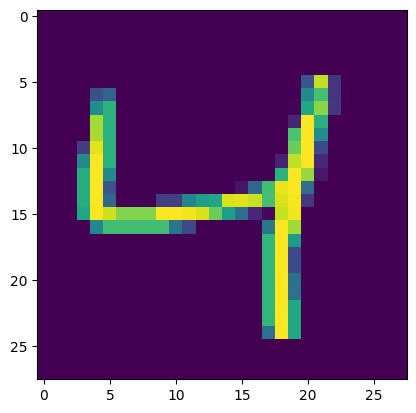

In [30]:
# Separate labels and one-hot-encode them
X = mnist
y = X.pop('label')
y =pd.get_dummies(y)

X = X.to_numpy()
X = X.reshape(70000, 28, 28,)
print(X.shape)
#plt.imshow(X[2], interpolation='none')
#plt.show()

#Separate out training and test/validation data
X_train, X_v, y_train, y_v = \
    train_test_split(X, y, stratify=y, train_size=0.70)

X_val, X_test, y_val, y_test = \
    train_test_split(X_v, y_v, stratify=y_v, train_size=0.66)

In [37]:
# Set up the model
#input_shape = [X_train.shape[1]]

model = keras.Sequential([
    layers.BatchNormalization(input_shape=(28,28,1)),
    
    # CNN
    layers.Conv2D(filters=32, activation='relu', kernel_size=(3,3)),
    layers.MaxPooling2D((2,2)),
    
    # Dense
    layers.Flatten(),
    layers.Dense(units=64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(units=10, activation='softmax')
])

In [38]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['acc'],
)

# Define early stopping callback
early_stopping = callbacks.EarlyStopping(
    min_delta = 0.0001,
    patience = 10,
    restore_best_weights = True
)

Epoch 1/50
196/196 [==============================] - 16s 72ms/step - loss: 0.2545 - acc: 0.9278 - val_loss: 0.1391 - val_acc: 0.9693
Epoch 2/50
196/196 [==============================] - 14s 70ms/step - loss: 0.0877 - acc: 0.9760 - val_loss: 0.0948 - val_acc: 0.9719
Epoch 3/50
196/196 [==============================] - 13s 68ms/step - loss: 0.0644 - acc: 0.9812 - val_loss: 0.0707 - val_acc: 0.9784
Epoch 4/50
196/196 [==============================] - 13s 67ms/step - loss: 0.0482 - acc: 0.9863 - val_loss: 0.0627 - val_acc: 0.9822
Epoch 5/50
196/196 [==============================] - 13s 68ms/step - loss: 0.0379 - acc: 0.9886 - val_loss: 0.0600 - val_acc: 0.9816
Epoch 6/50
196/196 [==============================] - 13s 66ms/step - loss: 0.0313 - acc: 0.9907 - val_loss: 0.0570 - val_acc: 0.9825
Epoch 7/50
196/196 [==============================] - 13s 69ms/step - loss: 0.0255 - acc: 0.9923 - val_loss: 0.0610 - val_acc: 0.9811
Epoch 8/50
196/196 [==============================] - 13s 66ms

<Axes: title={'center': 'Accuracy'}>

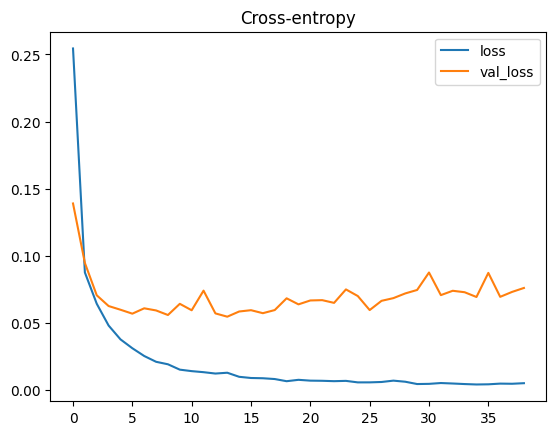

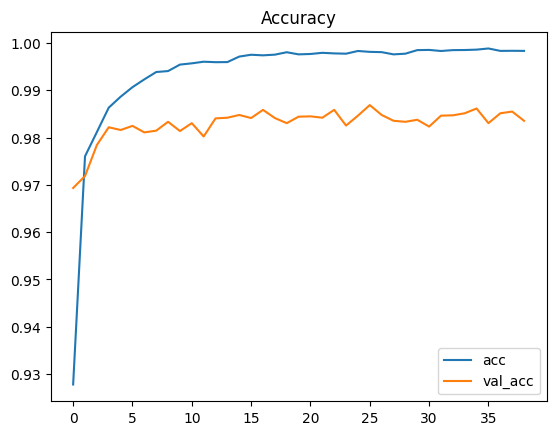

In [39]:
# Train the model
history = model.fit(
    X_train, y_train, 
    epochs=50, 
    batch_size=250,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['acc', 'val_acc']].plot(title="Accuracy")

Note: Using a CNN shows a significant improvement in loss and accuracy.

In [40]:
# Let's see the model performs on some test data
test_idx = 6
y_predicted = model.predict(X_test)
print('predicted value:', np.where(y_predicted[test_idx] == np.max(y_predicted[test_idx]))[0] )

y_example = np.asarray(y_test)
print('true value:', np.where(y_example[test_idx] == 1)[0] )

224/224 [==============================] - 1s 5ms/step
predicted value: [9]
true value: [9]
